In [1]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [2]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [3]:
annotation_round = 2

##### Define output and distance directories

In [4]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [5]:
import os
from utils import get_mutant_analysis_path, get_distance_path
data_dir = '1_mutant_statistics'

In [6]:
type_analysis_dir = get_mutant_analysis_path(data_dir, 'type', annotation_round)
type_analysis_dir_organism = os.path.join(type_analysis_dir, 'organism')
distance_dir = get_distance_path(data_dir)

In [7]:
# Create organism analysis directory if it does not exist
if not os.path.exists(type_analysis_dir_organism):
    os.makedirs(type_analysis_dir_organism)

##### Import analysis functions

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from mutants_in_pcm.preprocessing import merge_chembl_papyrus_mutants
from mutants_in_pcm.mutant_analysis_type import (extract_substitutions,
                                                 plot_heatmap_aa_change,
                                                 plot_bubble_aachange_distance,
                                                 plot_stacked_bars_mutation_type)
from mutants_in_pcm.mutant_analysis_family import obtain_chembl_family
from mutants_in_pcm.mutant_analysis_organism import annotate_organism_taxonomy
from mutants_in_pcm.mutant_analysis_protein import plot_distance_pdb_distribution

#### Mutation type analysis

In [10]:
# Read mutant annotated ChEMBL + Papyrus data
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)
annotated_data

,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455834,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN
455835,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN
455836,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN
455837,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN


In [11]:
# Check the target distribution of single mutants and multiple mutants in the dataset
extract_substitutions(annotated_data.drop_duplicates(subset=['target_id'])).groupby(['target_id_mutation_n'])['connectivity'].count().reset_index().rename(columns={'target_id_mutation_n':'n_substitutions',
                                                       'connectivity':'target_id_count'})

,n_substitutions,target_id_count
0,-1,42
1,0,326
2,1,1220
3,2,115
4,3,28
5,4,13
6,5,2
7,6,3
8,9,1
9,13,1


In [12]:
# Plot heatmaps with amino acid change counts
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'variant', None, None)
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'activity', None, None)

In [13]:
# Plot heatmaps with amino acid change counts
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'variant', None, None, keep_only_single=True)
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'activity', None, None, keep_only_single=True)

#### Enrich annotated data with ChEMBL families and taxonomical classifications

In [14]:
# Get ChEMBL families to extract protein family accession codes
chembl_families = obtain_chembl_family(chembl_version).fillna('Other')
kinases_accession_list = chembl_families[chembl_families['l2']=='Kinase']['accession'].tolist()
gpcrs_accession_list = chembl_families[chembl_families['l2'].str.contains('G protein-coupled receptor')]['accession'].tolist()

In [15]:
# Annotate data for the taxonomical classification based on domain (i.e. Virus, Bacteria, Archaea, or Eukaryota)
annotated_data_tax = annotate_organism_taxonomy(annotated_data)
annotated_data_tax

Fetched: 306 / 335


,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol,classification
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455834,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus
455835,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus
455836,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus
455837,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus


In [16]:
# Check E coli strains
annotated_data_tax[annotated_data_tax['Organism'].str.contains('Escherichia coli', na=False)].groupby(['Organism'])['accession'].nunique()

Organism
Escherichia coli (strain K12)                        7
Escherichia coli O127:H6 (strain E2348/69 / EPEC)    1
Name: accession, dtype: int64

In [17]:
# patch E coli strains into a single organism
def patch_ecoli(organism):
    if isinstance(organism, str) and ('Escherichia coli' in organism):
        return 'Escherichia coli'
    else:
        return organism
annotated_data_tax['Organism'] = annotated_data_tax['Organism'].apply(patch_ecoli)

##### Statistics per taxonomical groups

In [18]:
# Count organisms
annotated_data_tax.groupby(['classification'])['Organism'].nunique()

classification
Archaea       1
Bacteria     16
Eukaryota    14
Virus        14
Name: Organism, dtype: int64

In [19]:
# Count proteins
annotated_data_tax.groupby(['classification'])['accession'].nunique()

classification
Archaea        1
Bacteria      28
Eukaryota    275
Virus         28
Name: accession, dtype: int64

In [20]:
# Count proteins in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1',
                                                        'Escherichia coli'])].groupby(['Organism'])['accession'].nunique()

Organism
Escherichia coli                    8
Homo sapiens (Human)              235
Human immunodeficiency virus 1      5
Name: accession, dtype: int64

In [21]:
# Count variants
annotated_data_tax.groupby(['classification'])['target_id'].nunique()

classification
Archaea         2
Bacteria      115
Eukaryota    1410
Virus         217
Name: target_id, dtype: int64

In [22]:
# Count variants in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1','Escherichia coli'])].groupby(['Organism'])['target_id'].nunique()

Organism
Escherichia coli                    24
Homo sapiens (Human)              1225
Human immunodeficiency virus 1     119
Name: target_id, dtype: int64

In [23]:
# Count bioactivity data
annotated_data_tax.groupby(['classification'])['pchembl_value_Mean'].count()

classification
Archaea           2
Bacteria       3203
Eukaryota    429998
Virus         21972
Name: pchembl_value_Mean, dtype: int64

In [24]:
# Count bioactivity data in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1','Escherichia coli'])].groupby(['Organism'])['pchembl_value_Mean'].count()

Organism
Escherichia coli                    1345
Homo sapiens (Human)              412797
Human immunodeficiency virus 1     15512
Name: pchembl_value_Mean, dtype: int64

In [25]:
# Check how many bioactivity datapoints are there per organism (with taxonomical annotation)
annotated_data_tax.groupby(['classification','Organism'])['pchembl_value_Mean'].count().reset_index()

,classification,Organism,pchembl_value_Mean
0,Archaea,Pyrococcus horikoshii (strain ATCC 700860 / DS...,2
1,Bacteria,Bacillus anthracis,67
2,Bacteria,Bacillus subtilis (strain 168),4
3,Bacteria,Bacteroides thetaiotaomicron (strain ATCC 2914...,28
4,Bacteria,Escherichia coli,1345
5,Bacteria,Francisella tularensis subsp. tularensis (stra...,26
6,Bacteria,Lactococcus lactis subsp. cremoris (strain MG1...,23
7,Bacteria,Magnetospirillum gryphiswaldense,25
8,Bacteria,Mycobacterium tuberculosis,261
9,Bacteria,Mycobacterium tuberculosis (strain ATCC 25618 ...,640


In [26]:
# Check how many bioactivity datapoints are there per organism and variant (with taxonomical annotation)
annotated_data_tax.groupby(['classification','Organism','target_id'])['pchembl_value_Mean'].count()

classification  Organism                                                                                target_id   
Archaea         Pyrococcus horikoshii (strain ATCC 700860 / DSM 12428 / JCM 9974 / NBRC 100139 / OT-3)  O59010_D405N      1
                                                                                                        O59010_L130W      1
Bacteria        Bacillus anthracis                                                                      Q81R22_F96I      18
                                                                                                        Q81R22_WT        31
                                                                                                        Q81R22_Y102F     18
                                                                                                                       ... 
Virus           Influenza B virus (strain B/Lee/1940)                                                   P03474_WT       182
               

#### Plot mutation type statistics taking into account taxonomical classifications and organisms

##### Accumulated number of variants with individual amino acid changes

###### Homo sapiens

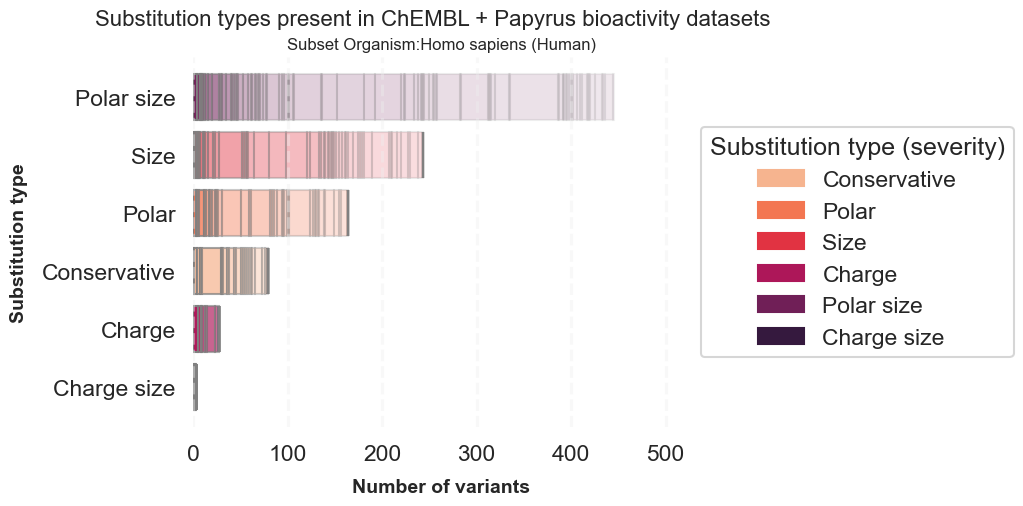

In [27]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'Organism', 'Homo sapiens (Human)', False, 
                                keep_only_single=False)

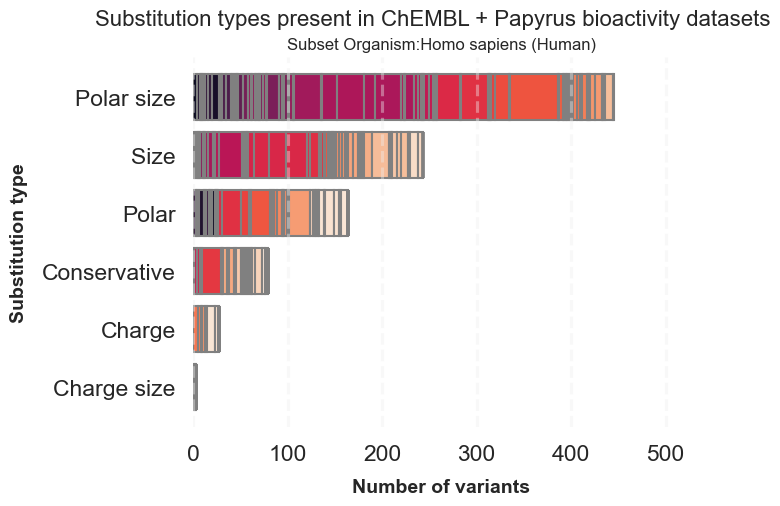

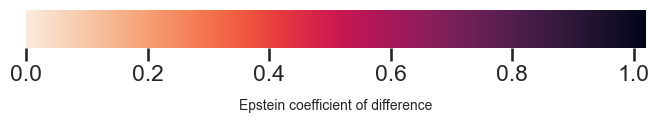

In [28]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'Organism', 'Homo sapiens (Human)', False, keep_only_single=False)

###### Bacteria

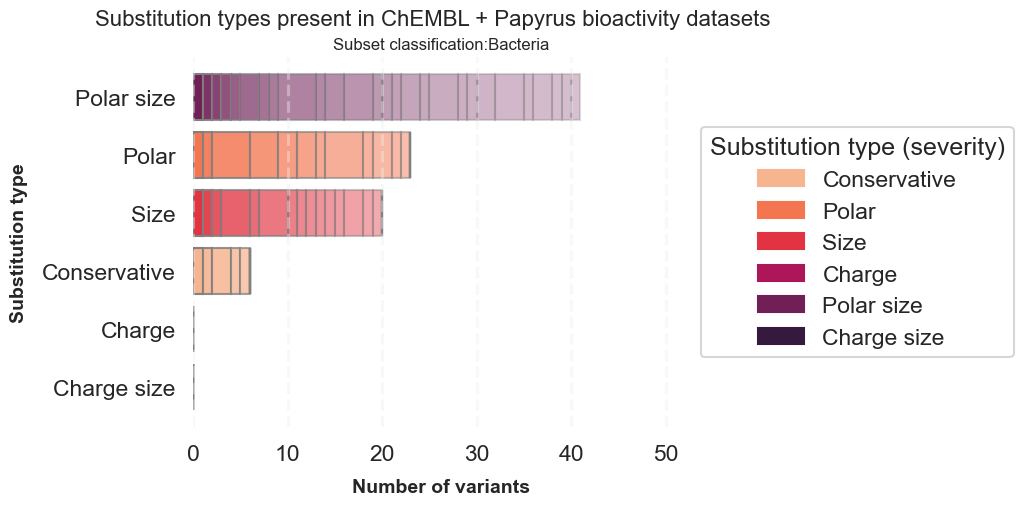

In [29]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'classification', 'Bacteria', False, keep_only_single=False)

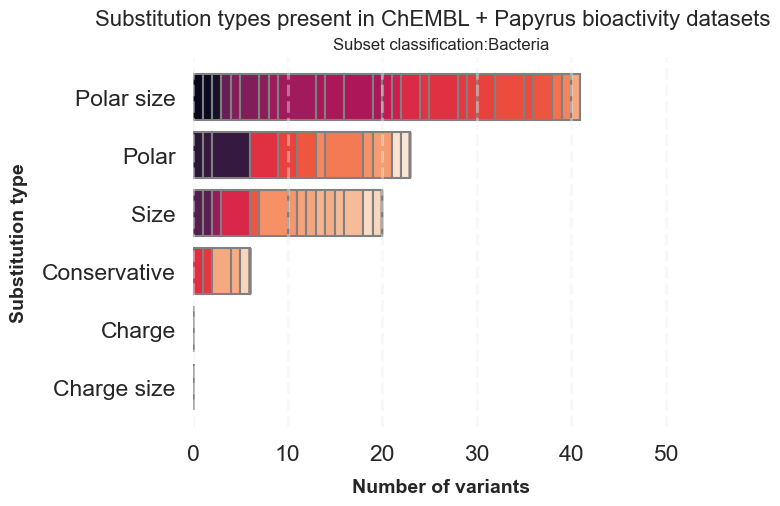

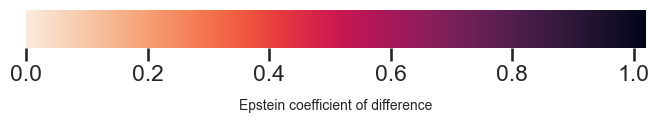

In [30]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'classification', 'Bacteria', False, keep_only_single=False)

###### Virus

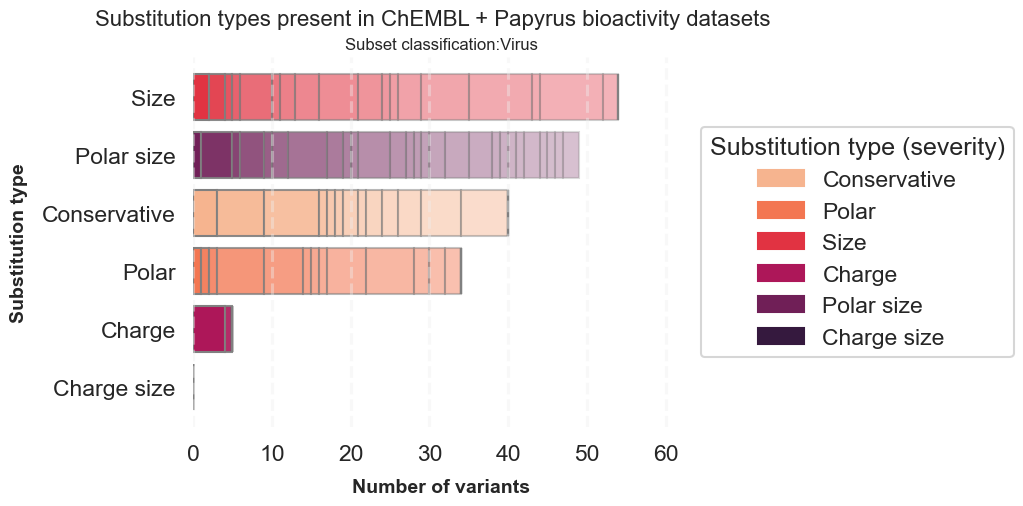

In [31]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'classification', 'Virus', False, keep_only_single=False)

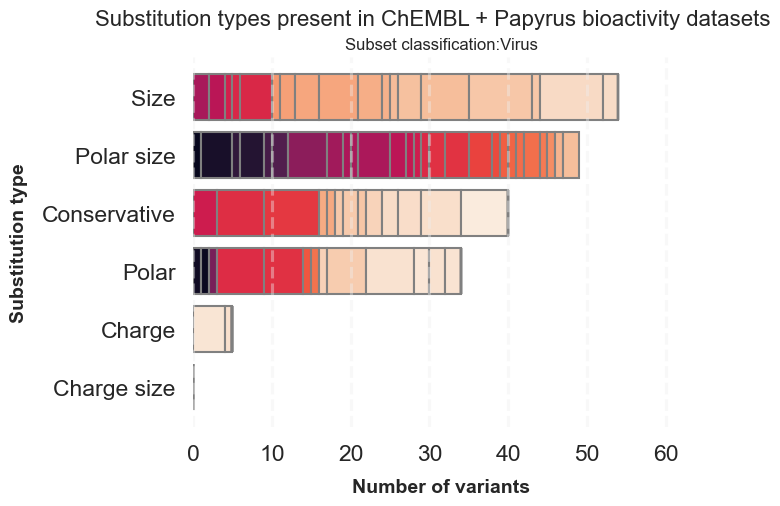

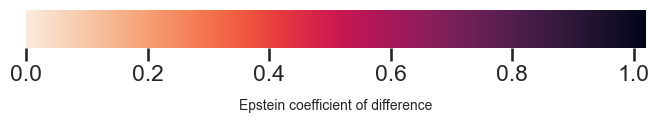

In [32]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'classification', 'Virus', False, keep_only_single=False)

##### Correlation between position of mutation and how disruptive it is

Fetched: 7 / 7
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
R

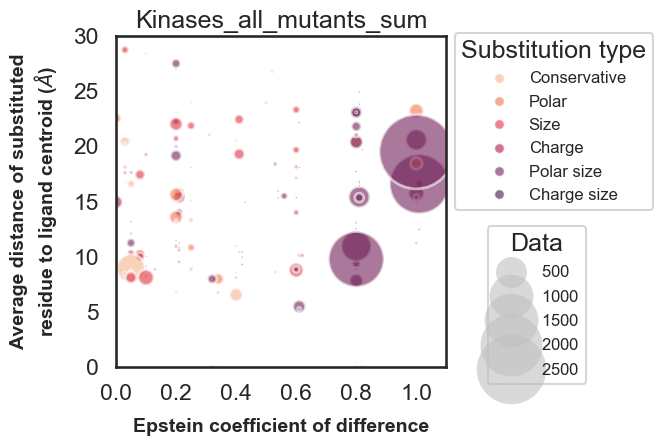

In [33]:
plot_bubble_aachange_distance(annotated_data, kinases_accession_list, 'Kinases', distance_dir,
                              type_analysis_dir, True,True, keep_only_single=False, sum_multiple_mutants=True)

Fetched: 2 / 2
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
R

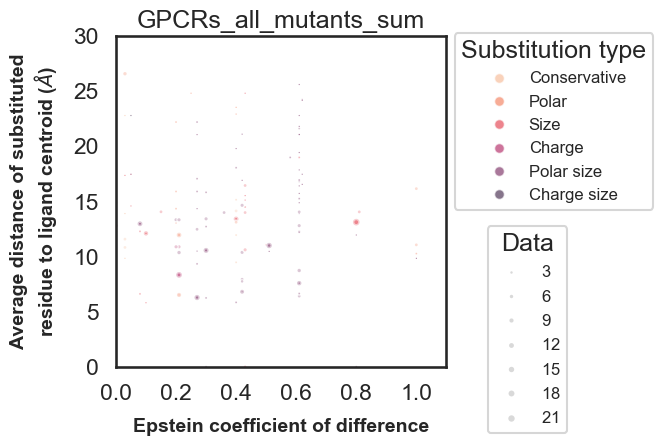

In [34]:
plot_bubble_aachange_distance(annotated_data, gpcrs_accession_list[:872], 'GPCRs', distance_dir,
                              type_analysis_dir, True,True, keep_only_single=False, sum_multiple_mutants=True)

Reading pre-computed distance results...
      target_id aa_change single_substitution mutation_type  connectivity  \
4  P00533_L858R        LR               L858R    polar_size           564   
7  P00533_T790M        TM               T790M    polar_size           275   
5  P00533_L861Q        LQ               L861Q         polar           108   
0  P00533_A750P        AP               A750P          size            62   
2  P00533_G719C        GC               G719C         polar            62   
6  P00533_P753S        PS               P753S    polar_size            58   
3  P00533_G719S        GS               G719S    polar_size            42   
1  P00533_C797S        CS               C797S          size             3   

   distance_matrix  mutant_dist  
4             1.01       16.602  
7             0.80        9.765  
5             1.00       23.242  
0             0.41       19.308  
2             0.34        7.974  
6             0.80       23.076  
3             0.32        7

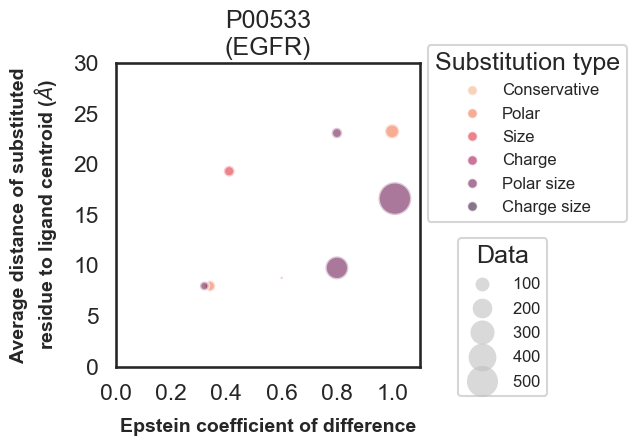

In [35]:
plot_bubble_aachange_distance(annotated_data, ['P00533'], 'EGFR', distance_dir,
                              type_analysis_dir, True,True, keep_only_single=True)

Reading pre-computed distance results...
                   target_id aa_change single_substitution mutation_type  \
16        P00533_T790M_L858R        TM               T790M    polar_size   
15        P00533_T790M_L858R        LR               L858R    polar_size   
4               P00533_L858R        LR               L858R    polar_size   
7               P00533_T790M        TM               T790M    polar_size   
5               P00533_L861Q        LQ               L861Q         polar   
10  P00533_T790M_C797S_L858R        CS               C797S          size   
12  P00533_T790M_C797S_L858R        TM               T790M    polar_size   
11  P00533_T790M_C797S_L858R        LR               L858R    polar_size   
0               P00533_A750P        AP               A750P          size   
2               P00533_G719C        GC               G719C         polar   
6               P00533_P753S        PS               P753S    polar_size   
3               P00533_G719S        GS         

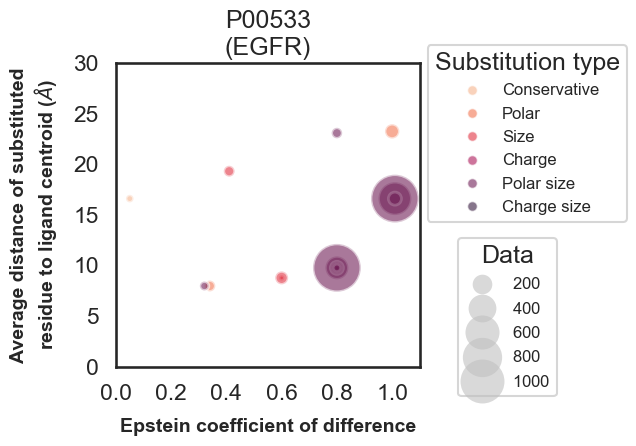

In [36]:
plot_bubble_aachange_distance(annotated_data, ['P00533'], 'EGFR', distance_dir,
                              type_analysis_dir, True,True, keep_only_single=False, sum_multiple_mutants=False)

Reading pre-computed distance results...
  single_substitution aa_change mutation_type  distance_matrix  mutant_dist  \
5               L858R        LR    polar_size             1.01       16.602   
8               T790M        TM    polar_size             0.80        9.765   
6               L861Q        LQ         polar             1.00       23.242   
1               C797S        CS          size             0.60        8.775   
0               A750P        AP          size             0.41       19.308   
2               G719C        GC         polar             0.34        7.974   
7               P753S        PS    polar_size             0.80       23.076   
3               G719S        GS    polar_size             0.32        7.974   
4               L858M        LM  conservative             0.05       16.602   

   connectivity                                          target_id  
5          1842  [P00533_L858R, P00533_T790M_C797S_L858R, P0053...  
8          1599  [P00533_T790M

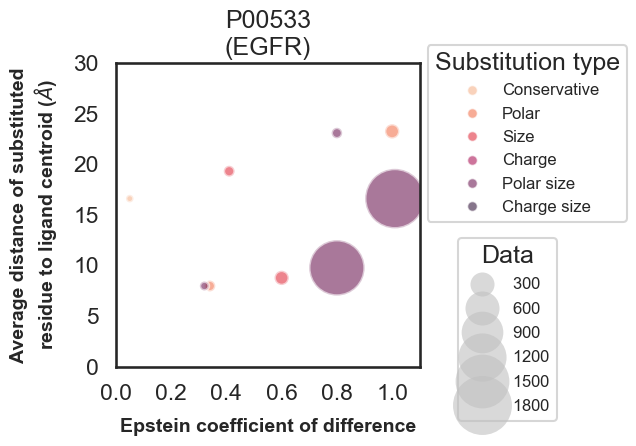

In [37]:
plot_bubble_aachange_distance(annotated_data, ['P00533'], 'EGFR', distance_dir,
                              type_analysis_dir, True,True, keep_only_single=False, sum_multiple_mutants=True)

,pdb,ligand,dist_719,dist_750,dist_753,dist_790,dist_816,dist_858
1M17_AQ4,1M17,AQ4,6.812,13.920,13.636,20.863,12.318,26.504
1XKK_FMM,1XKK,FMM,7.800,0.000,0.000,8.177,21.186,11.294
2ITO_IRE,2ITO,IRE,6.559,19.740,23.816,8.981,21.428,16.156
2ITP_AEE,2ITP,AEE,7.167,21.023,26.043,9.531,20.784,18.275
2ITT_AEE,2ITT,AEE,7.531,21.506,25.692,9.646,20.839,18.913
...,...,...,...,...,...,...,...,...
5ZTO_9JO,5ZTO,9JO,6.515,19.184,24.034,8.932,22.438,15.627
5ZWJ_9LL,5ZWJ,9LL,13.332,16.646,19.496,7.201,25.190,7.475
6LUB_EUX,6LUB,EUX,7.327,0.000,25.312,8.998,21.097,18.429
6P1L_9LL,6P1L,9LL,13.461,15.905,18.371,7.194,25.074,7.286


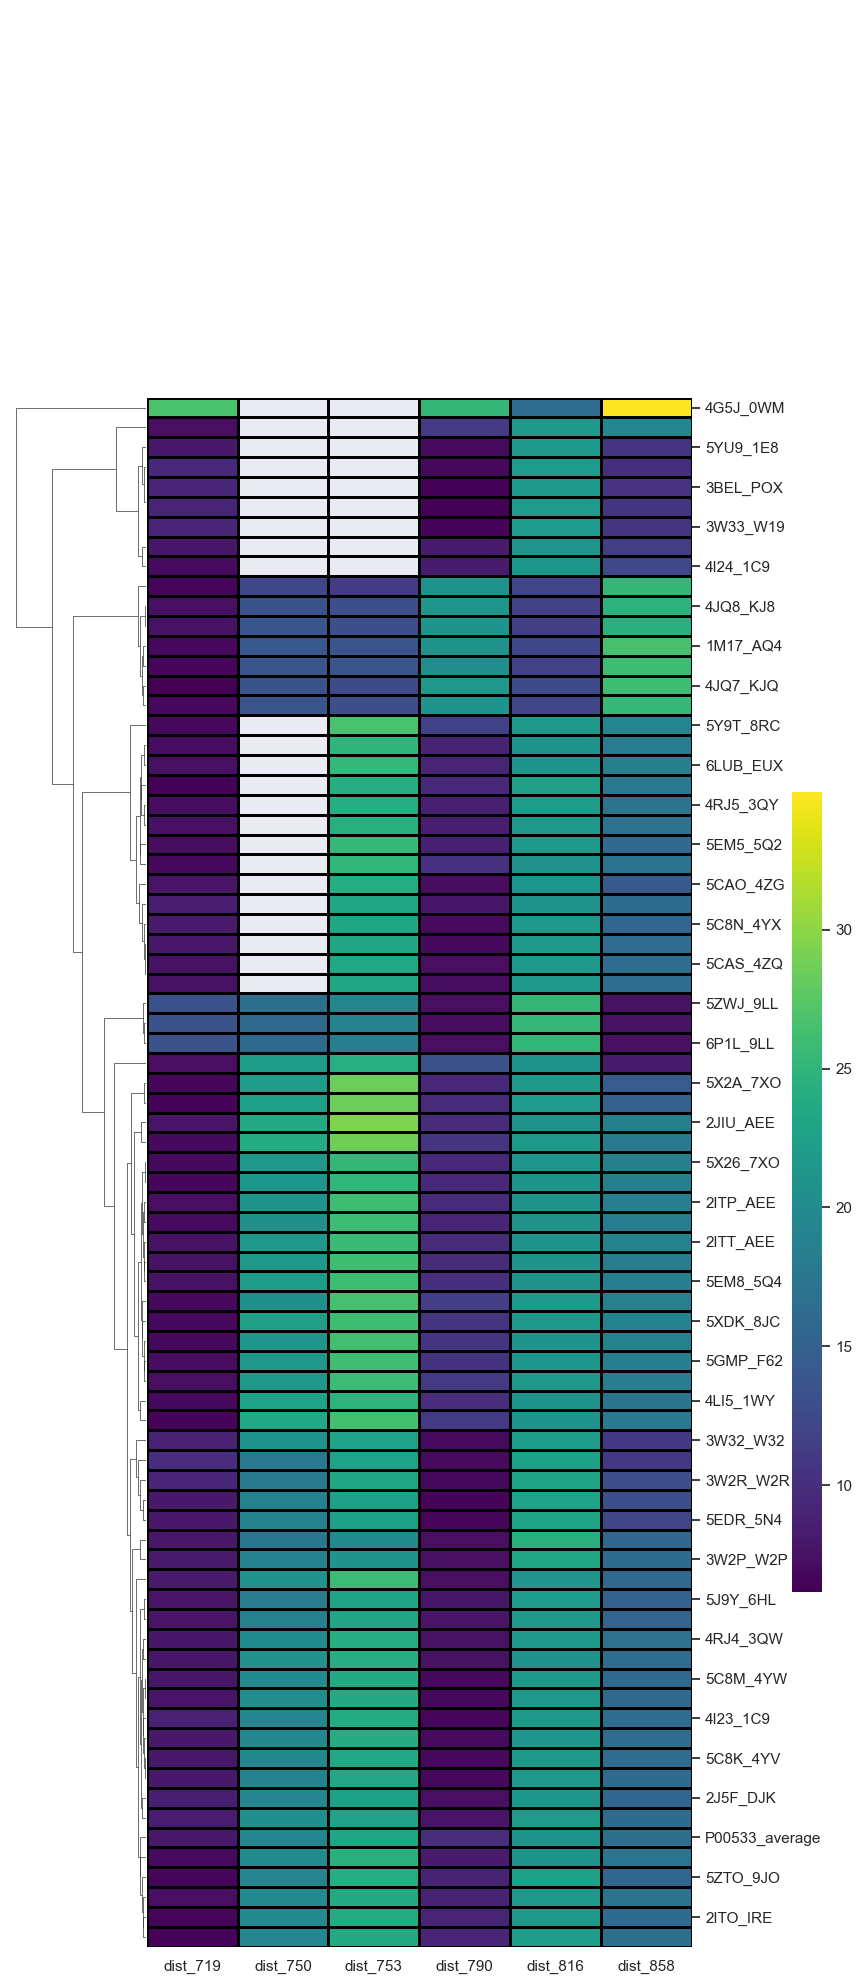

In [39]:
# Check the distribution of distances for the key EGFR mutated residues across analyzed PDBs
plot_distance_pdb_distribution(distance_dir, 'P00533', ['719','750','753','790','816','858'])

Reading pre-computed distance results...
   single_substitution aa_change mutation_type  distance_matrix  mutant_dist  \
10               T315I        TI    polar_size             0.80       10.950   
6                H396P        HP         polar             0.80       20.434   
8                Q252H        QH         polar             0.20       15.628   
13               Y253F        YF         polar             0.20       13.582   
7                M351T        MT    polar_size             0.80       20.403   
0                E255K        EK        charge             0.00       14.952   
3                F317L        FL          size             0.08       10.190   
2                F317I        FI          size             0.08       10.190   
5                G250E        GE    polar_size             0.56       15.501   
4                F359V        FV          size             0.10       19.264   
11               T315N        TN          size             0.20       10.950   

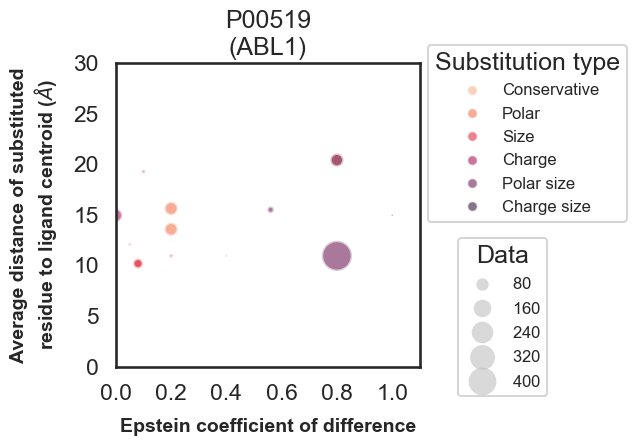

In [40]:
plot_bubble_aachange_distance(annotated_data, ['P00519'], 'ABL1', distance_dir,
                              type_analysis_dir, True,True, keep_only_single=False, sum_multiple_mutants=True)

Failed to map 2 ID(s).
Fetched: 26 / 28
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-compu

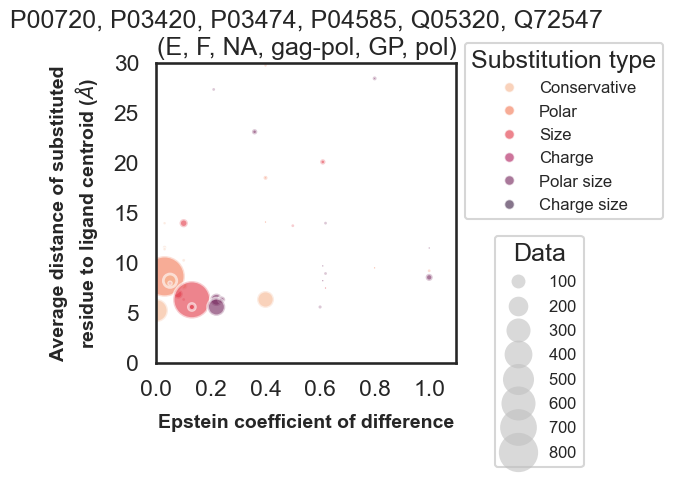

In [41]:
# Get all proteins from virus
virus_accession_list = annotated_data_tax[annotated_data_tax['classification']=='Virus'].accession.unique()\
    .tolist()
plot_bubble_aachange_distance(annotated_data, virus_accession_list, 'Virus', distance_dir,
                              type_analysis_dir_organism, True, True, keep_only_single=False, sum_multiple_mutants=True)

Fetched: 5 / 5
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
       target_id aa_change single_substitution mutation_type  connectivity  \
9   Q72547_K103N        KN               K103N         polar           550   
26  Q72547_Y181C        YC               Y181C          size           480   
11  Q72547_L100I        LI               L100I  conservative           261   
30  Q72547_Y188L        YL               Y188L    polar_size           162   
22  Q72547_V106A        VA               V106A  conservative           106   
2   Q72547_E138K        EK               E138K        charge            96   
18  Q72547_P236L        PL               P236L  conservative            93   
27  Q72547_Y181I        YI               Y181I    polar_size            78   
6   Q72547_G190A        GA               G190A  conservative            30   


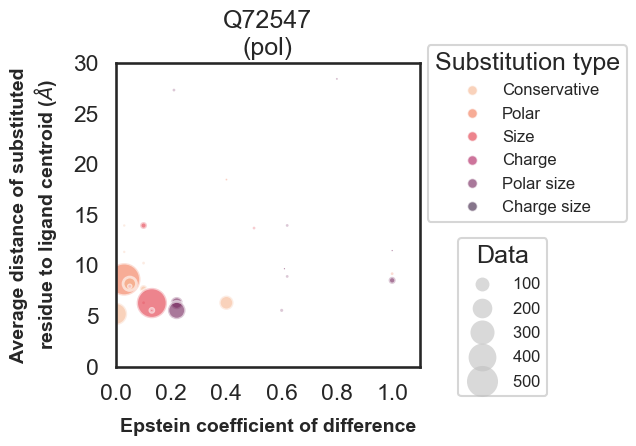

In [42]:
# Get proteins in HIV
hiv_accession_list = annotated_data[annotated_data['Organism'].str.contains('Human immunodeficiency virus 1', na=False)
]['accession'].unique().tolist()
plot_bubble_aachange_distance(annotated_data, hiv_accession_list, 'HIV', distance_dir,
                              type_analysis_dir_organism, True, True, keep_only_single=True)

Fetched: 5 / 5
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
                       target_id aa_change single_substitution mutation_type  \
9                   Q72547_K103N        KN               K103N         polar   
60                  Q72547_Y181C        YC               Y181C          size   
17                  Q72547_L100I        LI               L100I  conservative   
10            Q72547_K103N_Y181C        KN               K103N         polar   
11            Q72547_K103N_Y181C        YC               Y181C          size   
..                           ...       ...                 ...           ...   
28  Q72547_M41L_K65R_L210W_T215Y        KR                K65R          size   
29  Q72547_M41L_K65R_L210W_T215Y        LW               L210W    polar_size   
4                    Q72547_E89K        EK                E8

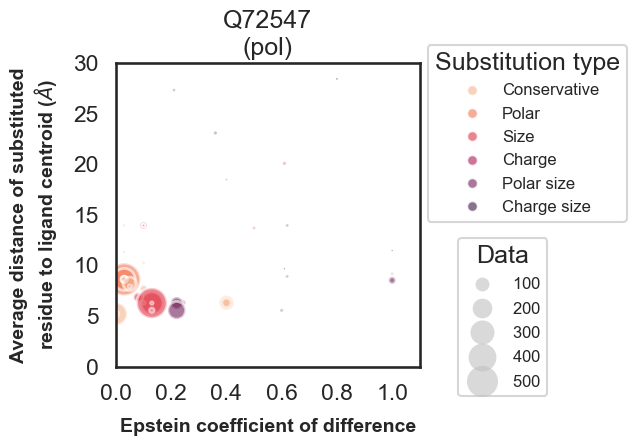

In [43]:
plot_bubble_aachange_distance(annotated_data, hiv_accession_list, 'HIV', distance_dir,
                              type_analysis_dir_organism, True, True, keep_only_single=False, sum_multiple_mutants=False)

Fetched: 5 / 5
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
   single_substitution aa_change mutation_type  distance_matrix  mutant_dist  \
11               K103N        KN         polar             0.03        8.626   
31               Y181C        YC          size             0.13        6.288   
13               L100I        LI  conservative             0.00        5.218   
36               Y188L        YL    polar_size             0.22        5.569   
27               V106A        VA  conservative             0.40        6.319   
3                E138K        EK        charge             0.00       54.285   
22               P236L        PL  conservative             0.05        8.194   
32               Y181I        YI    polar_size             0.22        6.288   
7                F227L        FL          size             0

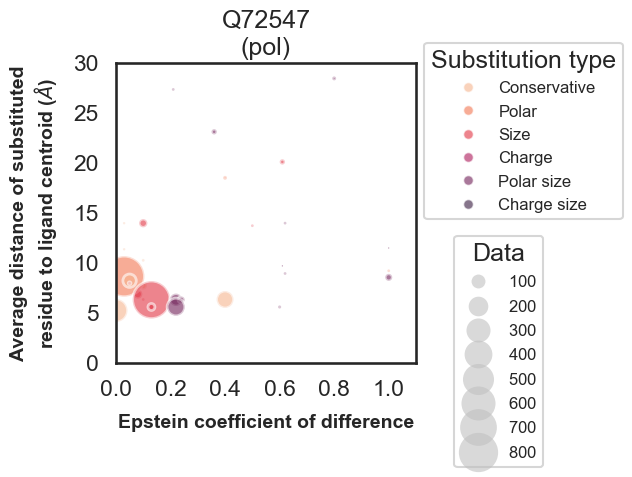

In [44]:
plot_bubble_aachange_distance(annotated_data, hiv_accession_list, 'HIV', distance_dir,
                              type_analysis_dir_organism, True, True, keep_only_single=False, sum_multiple_mutants=True)

Fetched: 28 / 28
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...

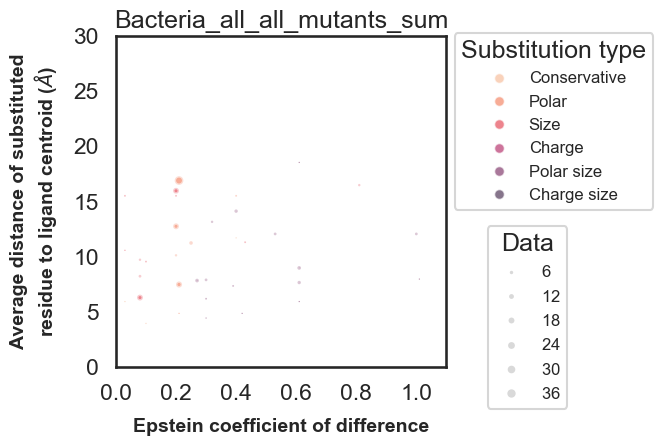

In [45]:
# Get all proteins from bacteria
bacteria_accession_list = annotated_data_tax[annotated_data_tax['classification']=='Bacteria'].accession.unique()\
    .tolist()
plot_bubble_aachange_distance(annotated_data, bacteria_accession_list, 'Bacteria_all', distance_dir,
                              type_analysis_dir_organism, True, True, keep_only_single=False, sum_multiple_mutants=True)

Fetched: 8 / 8
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
  single_substitution aa_change mutation_type  distance_matrix  mutant_dist  \
0                C63A        CA         polar             0.25       11.239   
1               G210S        GS    polar_size             0.32       13.157   
2               Q202W        QW          size             0.81       16.491   
3                T46A        TA         polar             0.40       15.518   
4                T46N        TN          size             0.20       15.518   
5                T46S        TS          size             0.03       15.518   

   connectivity             target_id  
0             7         [P0A725_C63A]  
1             3  [P0A72

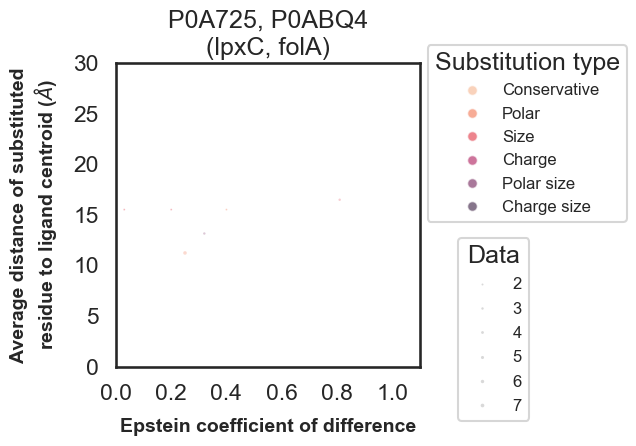

In [46]:
# Get all proteins from E.coli
ecoli_accession_list = annotated_data_tax[annotated_data_tax['Organism'] == 'Escherichia coli']['accession']\
    .unique().tolist()
plot_bubble_aachange_distance(annotated_data, ecoli_accession_list, 'EColi_All', distance_dir,
                              type_analysis_dir_organism, True, True, keep_only_single=False, sum_multiple_mutants=True)